<a href="https://colab.research.google.com/github/twishi03/Data/blob/main/Squidpy_Graph_Model_HighRes_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
!pip install squidpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.1/122.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import numpy as np

import squidpy as sq

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spatialdata/__init__.py:11: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [2]:
adata = sq.datasets.visium_fluo_adata()
adata

  0%|          | 0.00/242M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 2800 × 16562
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [3]:
sq.gr.spatial_neighbors(adata, n_rings=2, coord_type="grid", n_neighs=6)

In [4]:
adata.obsp["spatial_connectivities"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

In [5]:
adata.obsp["spatial_distances"]

<2800x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 48240 stored elements in Compressed Sparse Row format>

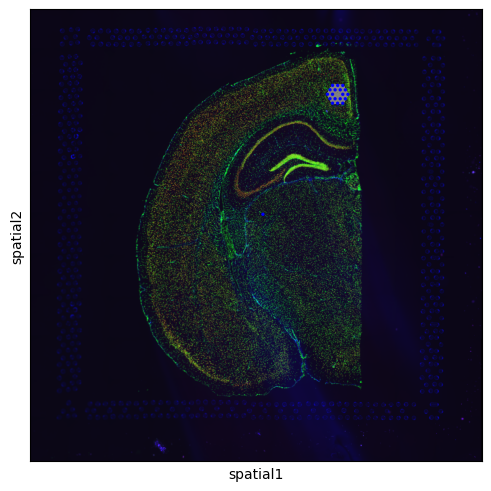

In [6]:
_, idx = adata.obsp["spatial_connectivities"][100, :].nonzero()
idx = np.append(idx, 90)
sq.pl.spatial_scatter(
    adata[idx, :],
    connectivity_key="spatial_connectivities",
    img=True,
    na_color="blue",
)

In [7]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               5295   
AAACAGAGCGACTCCT-1          1         14         94               2855   
AAACAGTGTTCCTGGG-1          1         73         43               2173   
AAACATTTCCCGGATT-1          1         61         97               5393   
AAACCGGGTAGGTACC-1          1         42         28               5242   
...                       ...        ...        ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64               3372   
TTGTTGTGTGTCAAGA-1          1         31         77               3768   
TTGTTTCACATCCAGG-1          1         58         42               4016   
TTGTTTCATTAGTCTA-1          1         60         30               3413   
TTGTTTCCATACAACT-1          1         45         27               3955   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.574707       16067.0            9.684585   
AAACAGAGCGACTCCT-1                 7.957177        6265.0            8.742893   
AAACAGTGTTCCTGGG-1                 7.684324        5327.0            8.580731   
AAACATTTCCCGGATT-1                 8.593043       17053.0            9.744140   
AAACCGGGTAGGTACC-1                 8.564649       16147.0            9.689551   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 8.123558        8671.0            9.067855   
TTGTTGTGTGTCAAGA-1                 8.234565        9005.0            9.105646   
TTGTTTCACATCCAGG-1                 8.298291       10796.0            9.287024   
TTGTTTCATTAGTCTA-1                 8.135640        8408.0            9.037058   
TTGTTTCCATACAACT-1                 8.282989       10205.0            9.230731   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   20.756831                    26.738034   
AAACAGAGCGACTCCT-1                   26.911413                    32.928970   
AAACAGTGTTCCTGGG-1                   38.164070                    44.997184   
AAACATTTCCCGGATT-1                   19.163783                    25.508708   
AAACCGGGTAGGTACC-1                   18.727937                    24.431783   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   28.578019                    34.794141   
TTGTTGTGTGTCAAGA-1                   20.755136                    26.496391   
TTGTTTCACATCCAGG-1                   22.860319                    29.455354   
TTGTTTCATTAGTCTA-1                   23.786870                    30.340152   
TTGTTTCCATACAACT-1                   22.018618                    28.113670   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    34.430821                    47.986556   
AAACAGAGCGACTCCT-1                    41.037510                    55.770152   
AAACAGTGTTCCTGGG-1                    52.750141                    65.778112   
AAACATTTCCCGGATT-1                    34.316543                    48.824254   
AAACCGGGTAGGTACC-1                    32.402304                    46.522574   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    42.647907                    56.314151   
TTGTTGTGTGTCAAGA-1                    34.169906                    48.684064   
TTGTTTCACATCCAGG-1                    38.291960                    52.889959   
TTGTTTCATTAGTCTA-1                    38.808278                    53.651284   
TTGTTTCCATACAACT-1                    36.364527                    50.994610   

                    total_counts_MT  log1p_total_counts_MT  pct_counts_MT  \
AAACAAGTATCTCCCA-1              0.0                    0.0            0.0   
AAACAGAGCGACTCCT-1              0.0                    0.0            0.0   
AAACAGTGTTCCTGGG-

In [8]:
adata = sq.datasets.imc()
adata

  0%|          | 0.00/1.50M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 4668 × 34
    obs: 'cell type'
    uns: 'cell type_colors'
    obsm: 'spatial'

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


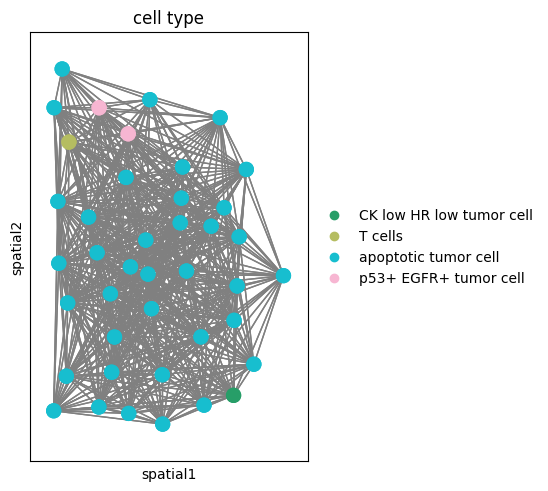

In [9]:
sq.gr.spatial_neighbors(adata, n_neighs=40, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][100, :].nonzero()
idx = np.append(idx, 100)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=400,
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_color_utils.py:27: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  target.uns[color_key] = source.uns[color_key]
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


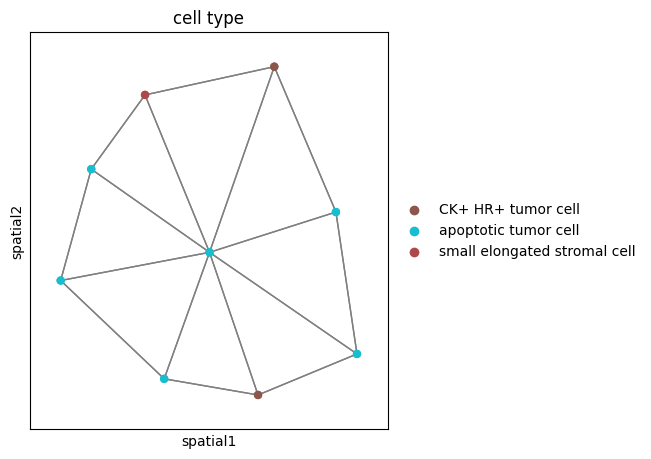

In [10]:
sq.gr.spatial_neighbors(adata, delaunay=True, coord_type="generic")
_, idx = adata.obsp["spatial_connectivities"][420, :].nonzero()
idx = np.append(idx, 420)
sq.pl.spatial_scatter(
    adata[idx, :],
    shape=None,
    color="cell type",
    connectivity_key="spatial_connectivities",
    size=100,
)

In [11]:
sq.gr.spatial_neighbors(adata, radius=0.6, coord_type="generic")

adata.obsp["spatial_connectivities"]
adata.obsp["spatial_distances"]

<4668x4668 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [12]:
import anndata as ad
import scanpy as sc
import squidpy as sq

adata = sq.datasets.visium_hne_adata()

  0%|          | 0.00/314M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


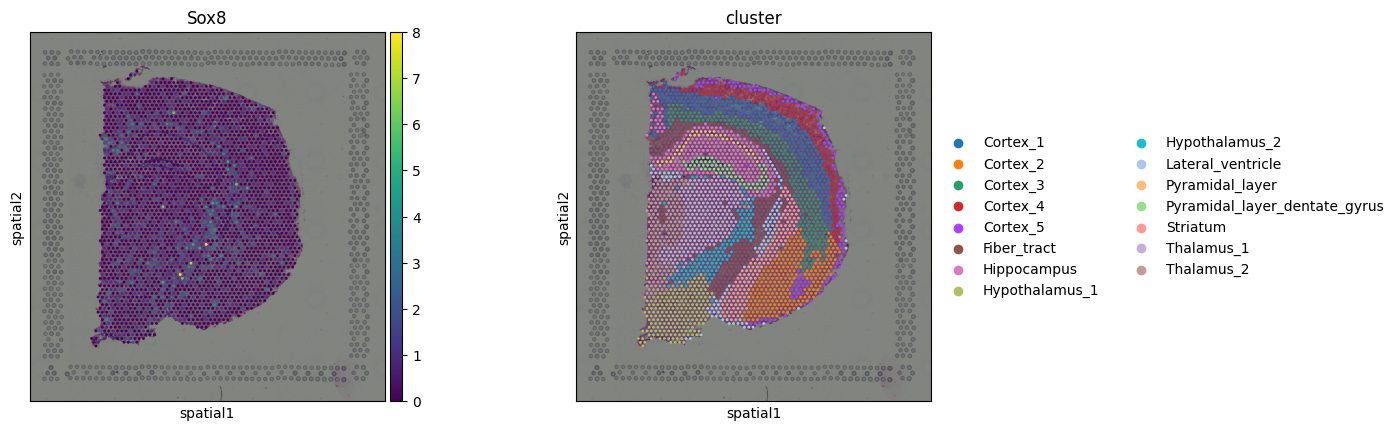

In [13]:
sq.pl.spatial_scatter(adata, color=["Sox8", "cluster"])

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


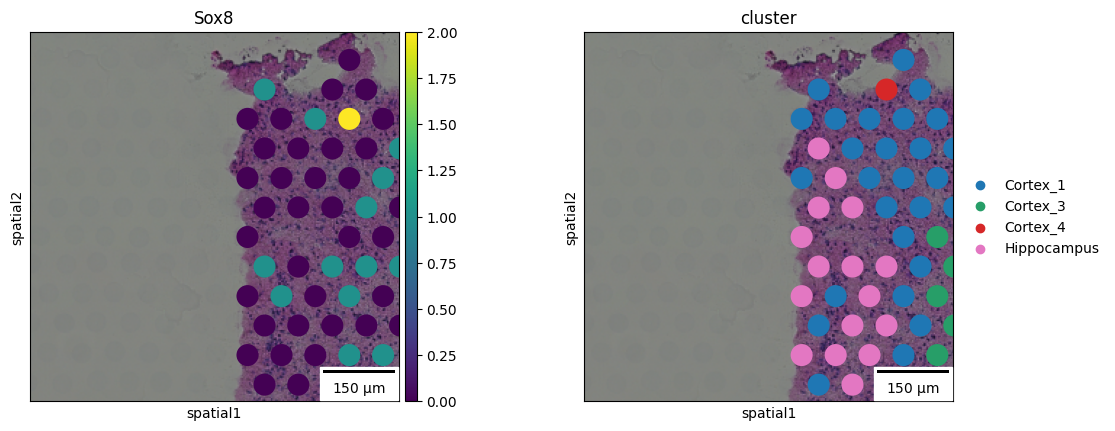

In [14]:
sq.pl.spatial_scatter(
    adata,
    color=["Sox8", "cluster"],
    crop_coord=[(1500, 1500, 3000, 3000)],
    scalebar_dx=3.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a

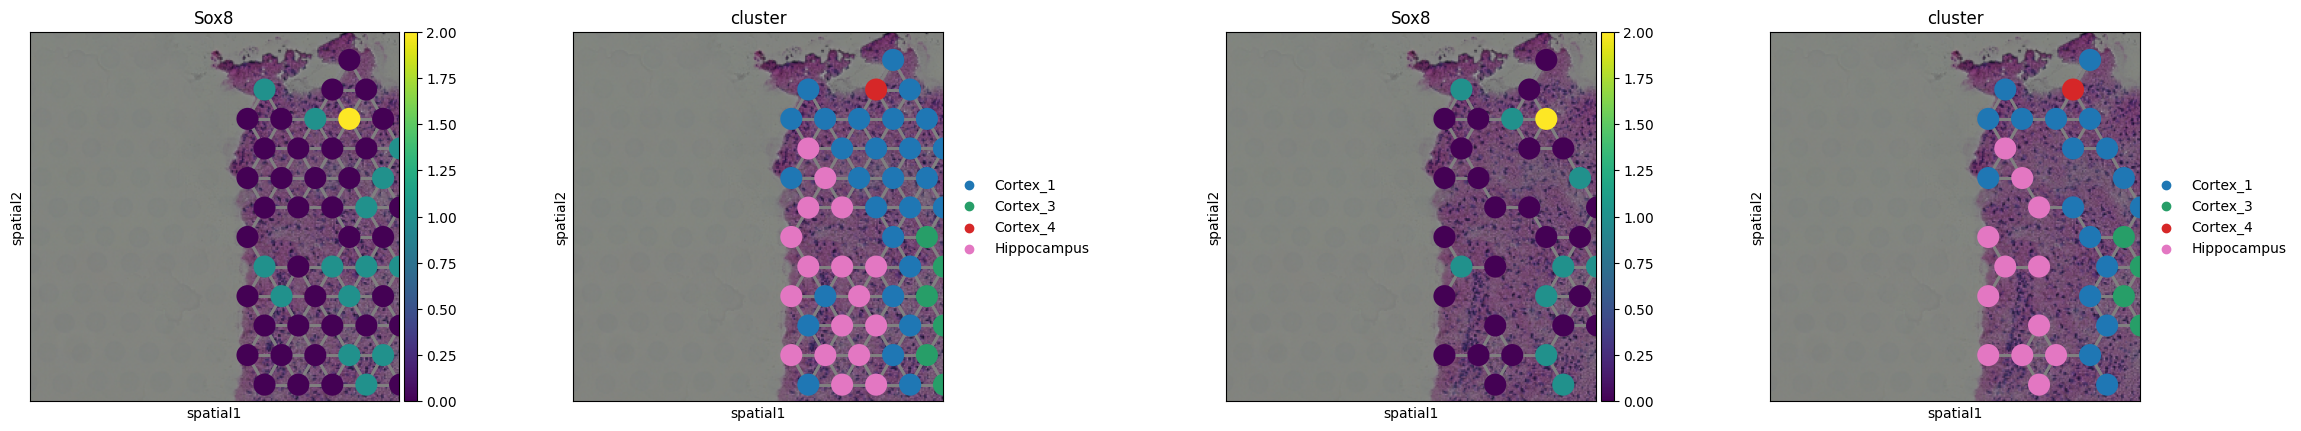

In [15]:
sq.gr.spatial_neighbors(adata)
adata2 = sc.pp.subsample(adata, fraction=0.5, copy=True)
adata2.uns["spatial"] = {}
adata2.uns["spatial"]["V2_Adult_Mouse_Brain"] = adata.uns["spatial"][
    "V1_Adult_Mouse_Brain"
]
adata_concat = ad.concat(
    {"V1_Adult_Mouse_Brain": adata, "V2_Adult_Mouse_Brain": adata2},
    label="library_id",
    uns_merge="unique",
    pairwise=True,
)
sq.pl.spatial_scatter(
    adata_concat,
    color=["Sox8", "cluster"],
    library_key="library_id",
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


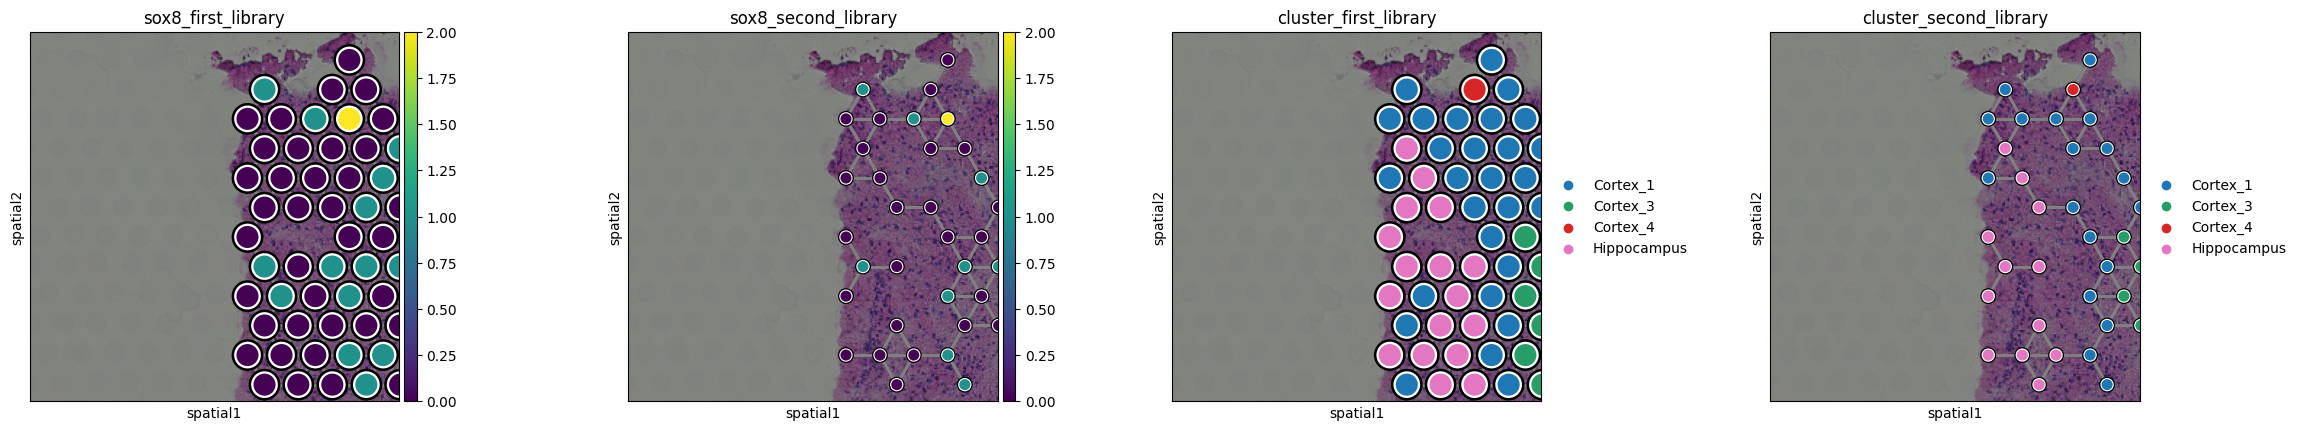

In [16]:
sq.pl.spatial_scatter(
    adata_concat,
    color=["Sox8", "cluster"],
    library_key="library_id",
    library_first=False,
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
    outline=True,
    outline_width=[0.05, 0.05],
    size=[1, 0.5],
    title=[
        "sox8_first_library",
        "sox8_second_library",
        "cluster_first_library",
        "cluster_second_library",
    ],
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:934: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:945: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:934: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:945: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. 

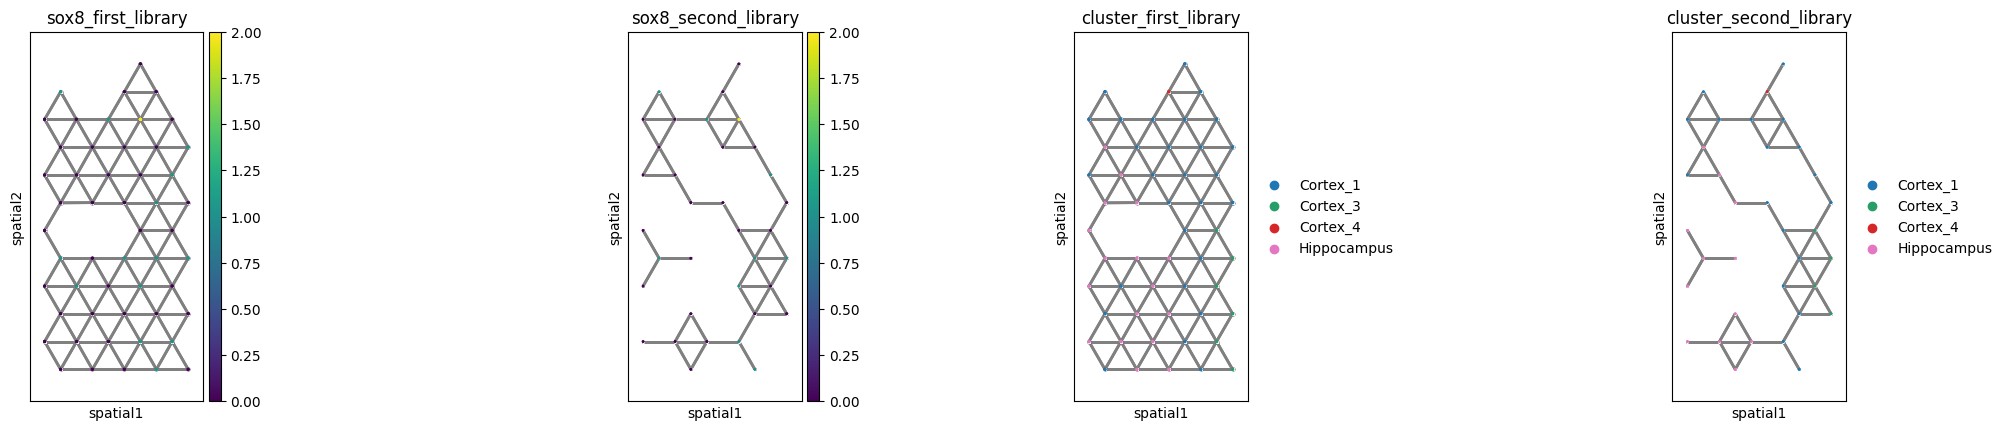

In [17]:
sq.pl.spatial_scatter(
    adata_concat,
    shape=None,
    color=["Sox8", "cluster"],
    library_key="library_id",
    library_first=False,
    connectivity_key="spatial_connectivities",
    edges_width=2,
    crop_coord=[(1500, 1500, 3000, 3000), (1500, 1500, 3000, 3000)],
    outline=True,
    outline_width=[0.05, 0.05],
    size=[1, 0.5],
    title=[
        "sox8_first_library",
        "sox8_second_library",
        "cluster_first_library",
        "cluster_second_library",
    ],
)

In [18]:
import squidpy as sq

adata = sq.datasets.mibitof()
adata.uns["spatial"].keys()

  0%|          | 0.00/19.3M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


dict_keys(['point16', 'point23', 'point8'])

In [19]:
adata.obs

row_num  point  cell_id       X1  center_rowcoord  center_colcoord  \
3034-0      3086     23        2  60316.0            269.0              7.0   
3035-0      3087     23        3  60317.0            294.0              6.0   
3036-0      3088     23        4  60318.0            338.0              4.0   
3037-0      3089     23        6  60320.0            372.0              6.0   
3038-0      3090     23        8  60322.0            417.0              5.0   
...          ...    ...      ...      ...              ...              ...   
47342-2    48953     16     1103   2779.0            143.0           1016.0   
47343-2    48954     16     1104   2780.0            814.0           1017.0   
47344-2    48955     16     1105   2781.0            874.0           1018.0   
47345-2    48956     16     1106   2782.0            257.0           1019.0   
47346-2    48957     16     1107   2783.0            533.0           1019.0   

         cell_size   category donor        Cluster batch library_id  
3034-0       408.0  carcinoma  21d7     Epithelial     0    point23  
3035-0       408.0  carcinoma  21d7     Epithelial     0    point23  
3036-0       304.0  carcinoma  21d7      Imm_other     0    point23  
3037-0       219.0  carcinoma  21d7  Myeloid_CD11c     0    point23  
3038-0       303.0  carcinoma  21d7  Myeloid_CD11c     0    point23  
...            ...        ...   ...            ...   ...        ...  
47342-2      283.0  carcinoma  90de     Fibroblast     2    point16  
47343-2      147.0  carcinoma  90de     Fibroblast     2    point16  
47344-2      142.0  carcinoma  90de      Imm_other     2    point16  
47345-2      108.0  carcinoma  90de     Fibroblast     2    point16  
47346-2      111.0  carcinoma  90de     Fibroblast     2    point16  

[3309 rows x 12 columns]

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desire

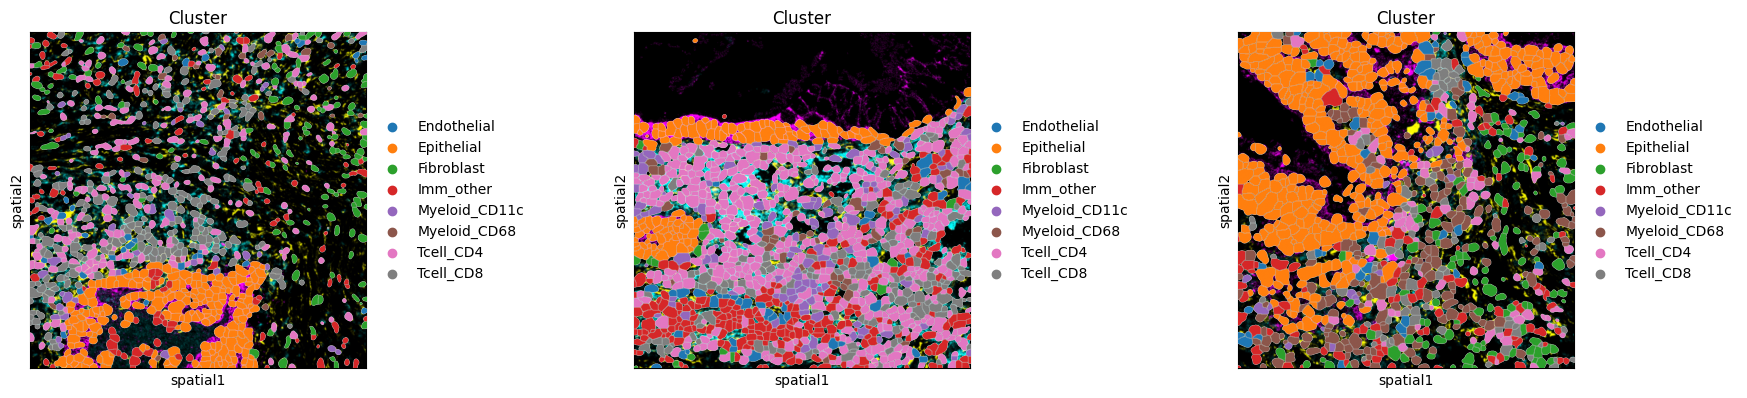

In [20]:
sq.pl.spatial_segment(
    adata, color="Cluster", library_key="library_id", seg_cell_id="cell_id"
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


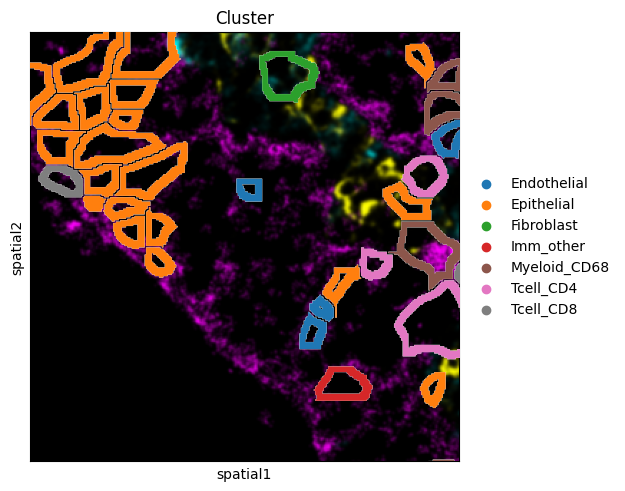

In [21]:
sq.pl.spatial_segment(
    adata,
    color="Cluster",
    library_key="library_id",
    library_id="point8",
    seg_cell_id="cell_id",
    seg_contourpx=10,
    crop_coord=[(0, 0, 300, 300)],
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


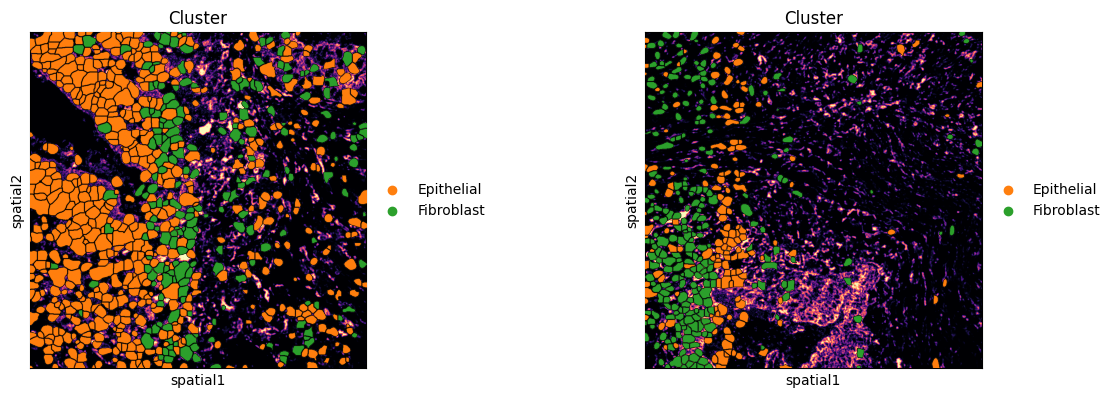

In [22]:
sq.pl.spatial_segment(
    adata,
    color="Cluster",
    groups=["Fibroblast", "Epithelial"],
    library_key="library_id",
    library_id=["point8", "point16"],
    seg_cell_id="cell_id",
    seg_outline=True,
    img_channel=0,
    img_cmap="magma",
)

/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/usr/local/lib/python3.10/dist-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desire

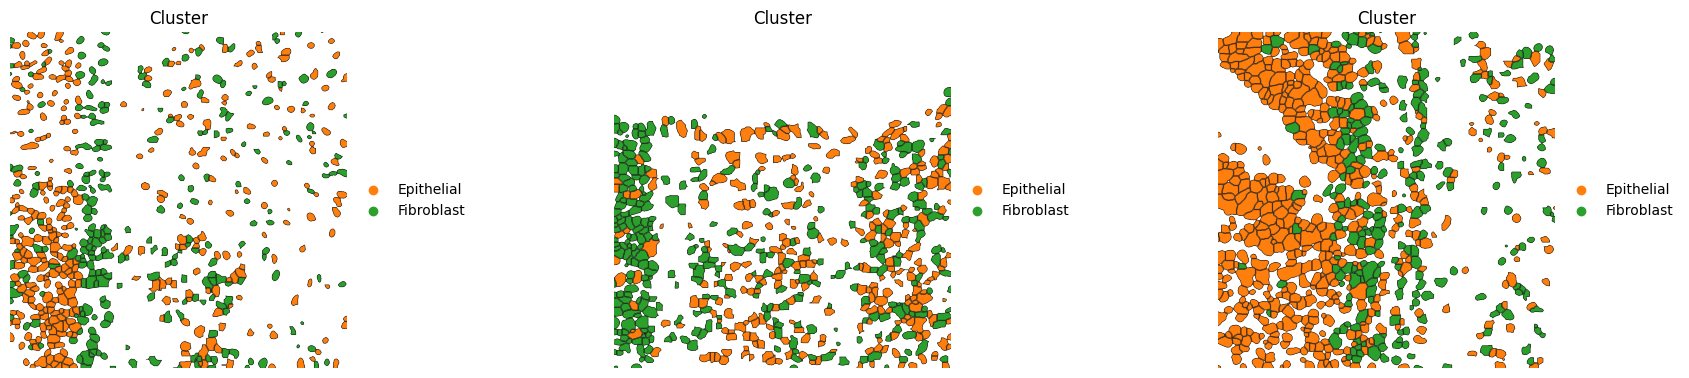

In [23]:
sq.pl.spatial_segment(
    adata,
    color="Cluster",
    groups=["Fibroblast", "Epithelial"],
    library_key="library_id",
    seg_cell_id="cell_id",
    seg_outline=True,
    img=False,
    frameon=False,
)

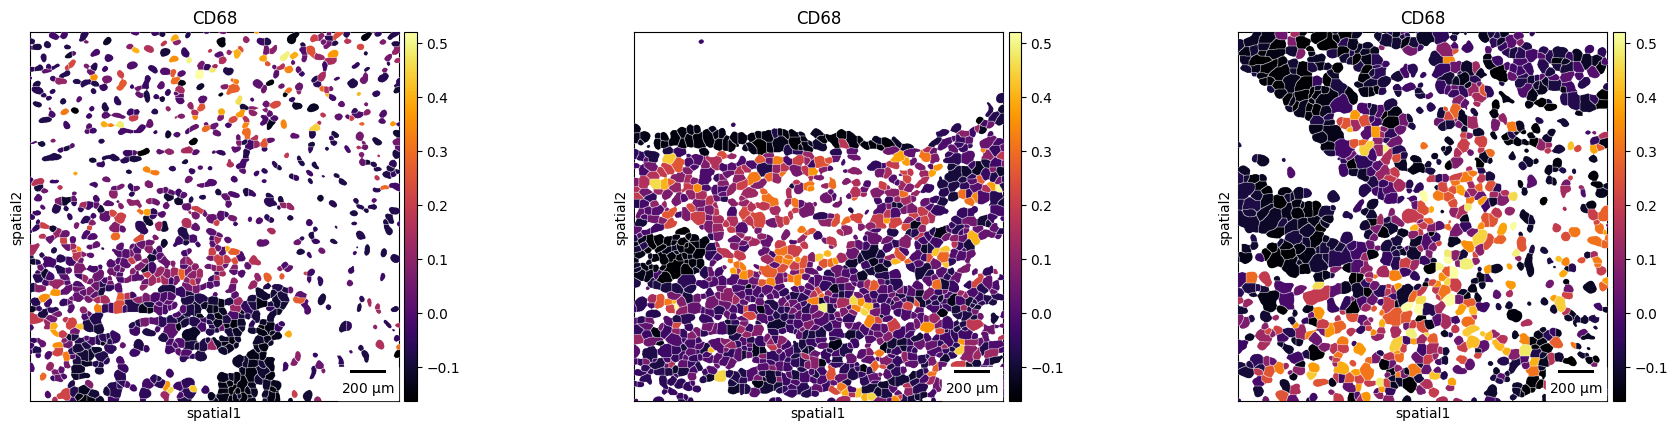

In [24]:
sq.pl.spatial_segment(
    adata,
    color="CD68",
    library_key="library_id",
    seg_cell_id="cell_id",
    img=False,
    cmap="inferno",
    scalebar_dx=2.0,
    scalebar_kwargs={"scale_loc": "bottom", "location": "lower right"},
)